In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.utils import np_utils
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
DATADIR = 'train' #dataset file
CATEGORIES = ["Angry", "Happy", "Neutral", "Sad", "Surprise"] #The emotions to be classify
IMG_SIZE = 48
batch_size = 100
epochs = 8

In [3]:
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:  # do 
        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2, 3, or 4)
        for img in os.listdir(path):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass


create_training_data()

In [4]:
emotions=np.array(training_data)
labels=np.array(labels)

In [5]:
np.save("emotions",emotions)
np.save("labels",labels)

In [6]:
emotions=np.load("emotions.npy")
labels=np.load("labels.npy")

In [7]:
s=np.arange(emotions.shape[0])
np.random.shuffle(s)
emotions=emotions[s]
labels=labels[s]

In [8]:
num_classes=len(np.unique(labels))
data_length=len(emotions)

In [9]:
(x_train,x_test)=emotions[(int)(0.1*data_length):],emotions[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [10]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

In [11]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [13]:
#make model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48, 48, 1)))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [14]:
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          )

checkpoint = ModelCheckpoint('emotionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_split=0.3, callbacks=[earlystop, checkpoint])

Train on 12143 samples, validate on 5205 samples
Epoch 1/8
12143/12143 [==============================] - 28s 2ms/step - loss: 1.5937 - accuracy: 0.2345 - val_loss: 1.5810 - val_accuracy: 0.2565

Epoch 00001: val_loss improved from inf to 1.58101, saving model to emotionModel.h5
Epoch 2/8
12143/12143 [==============================] - 27s 2ms/step - loss: 1.5493 - accuracy: 0.2842 - val_loss: 1.4511 - val_accuracy: 0.3554

Epoch 00002: val_loss improved from 1.58101 to 1.45112, saving model to emotionModel.h5
Epoch 3/8
12143/12143 [==============================] - 27s 2ms/step - loss: 1.4188 - accuracy: 0.3767 - val_loss: 1.3072 - val_accuracy: 0.4611

Epoch 00003: val_loss improved from 1.45112 to 1.30724, saving model to emotionModel.h5
Epoch 4/8
12143/12143 [==============================] - 27s 2ms/step - loss: 1.2778 - accuracy: 0.4699 - val_loss: 1.1868 - val_accuracy: 0.5120

Epoch 00004: val_loss improved from 1.30724 to 1.18682, saving model to emotionModel.h5
Epoch 5/8
12143

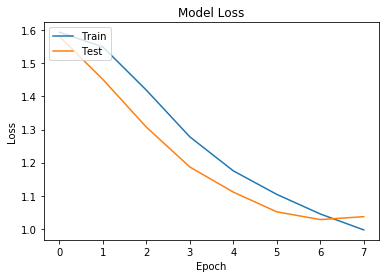

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()